## RL Lab03 - Dummy Q-learning(table)

### Setup

In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym.envs.registration import register
import random as pr

def rargmax(vector):
    """ Argmax that chooses randomly among eligible maximum indices. """
    m = np.max(vector)
    indices = np.nonzero(vector == m)[0]
    return pr.choice(indices)

register(id='FrozenLake-v3',
         entry_point='gym.envs.toy_text:FrozenLakeEnv',
         kwargs={'map_name': '4x4',
                 'is_slippery': False})
env = gym.make('FrozenLake-v3')
env.render()

[2017-07-08 23:52:19,706] Making new env: FrozenLake-v3



SFFF
FHFH
FFFH
HFFG


### Q-learning

In [2]:
# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
num_episodes = 2000

# Create lists to contation taotal rewards and steps per episodes
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False
    
    # The Q-Table learning algorithm
    while not done:
        action = rargmax(Q[state, :])
        
        # Get new state and reward from environmnet
        new_state, reward, done, _ = env.step(action)
        
        # Update Q-Table with new knowleage using learing
        Q[state, action] = reward + np.max(Q[new_state,:])
        
        rAll += reward
        state = new_state

    rList.append(rAll)

### Result reporting

Success rate:0.91
Final Q-Table Values
LEFT DOWN RIGHT UP
[[ 0.  0.  1.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  1.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  1.  0.]
 [ 0.  0.  0.  0.]]


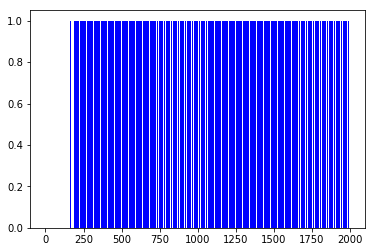

In [4]:
print('Success rate:' + str(sum(rList)/num_episodes))
print('Final Q-Table Values')
print('LEFT DOWN RIGHT UP')
print(Q)
plt.bar(range(len(rList)), rList, color='b')
plt.show()